In [1]:
import sys
sys.path.append('../src')

import numpy as np
import random
import tensorflow as tf

from data_loading import BavarianBuildingDataset, generator
from visualize import Visualizer

from backbone import Backbone
from rpn import RPN
from roi_align import ROIAlignLayer
from classifier import Classifier
from mask_head import MaskHead
from utils import Config

In [2]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

In [3]:
config = Config()
config.info()

image_shape: (250, 250, 3)
num_classes: 2
batch_size: 32
model_dir: ../model/
anchor_scales: [0.5, 1, 1.5, 2]
anchor_ratios: [1, 1.5, 2]
backbone_weights: imagenet
backbone_trainable_layers: 3
rpn_conv_filters: 512
rpn_max_proposals: 100
rpn_iou_threshold: 0.7
rpn_score_threshold: 0.5
rpn_optimizer: adam
roi_align_pool_size: (7, 7)
classifier_dense_units: 1024
classifier_optimizer: adam
mask_head_conv_filters: 256
mask_head_upsample_filters: 256
mask_head_optimizer: adam


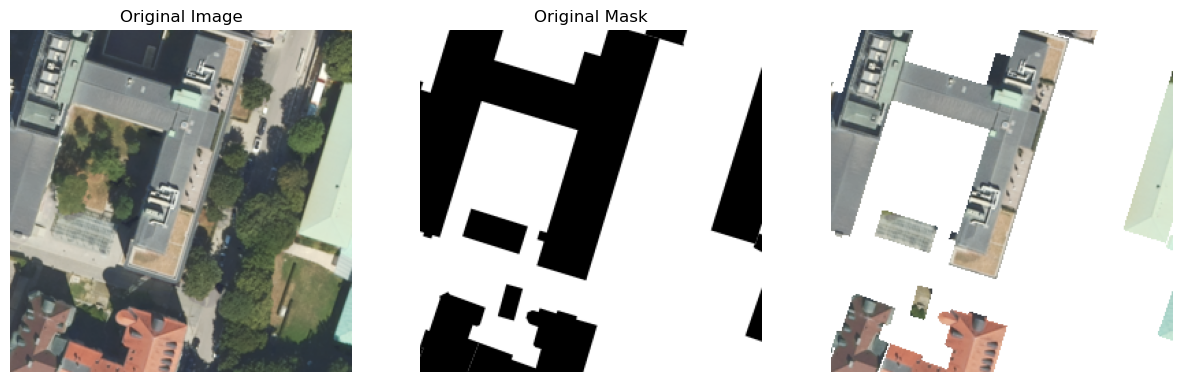

In [4]:
dataset = BavarianBuildingDataset(image_dir='../data/bbd250-image', mask_dir='../data/bbd250-umring')
gen = generator(dataset, dataset.train_test_val_split()[0], batch_size=config.batch_size)
images, masks = next(gen)

testing_image = np.expand_dims(images[0], axis=0)
testing_mask = np.expand_dims(masks[0], axis=0)

Visualizer.display_sample(testing_image[0], testing_mask[0])

1/1 [==============================] - 3s 3s/step


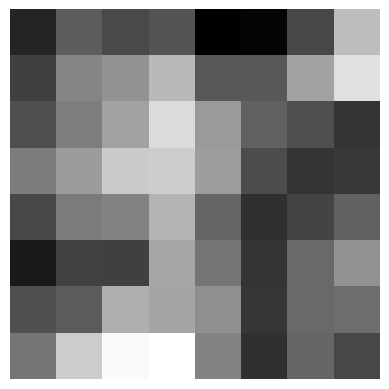

In [5]:
backbone = Backbone(config)

feature_maps = backbone.model.predict(testing_image)
Visualizer.display_avg_feature_map(feature_maps)

1/1 [==============================] - 6s 6s/step


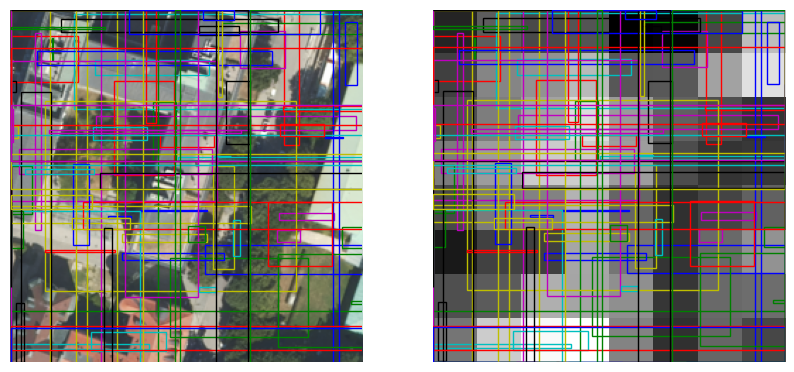

In [6]:
rpn = RPN(config, backbone)

roi_boxes = rpn.model.predict(feature_maps)
Visualizer.display_rois(testing_image[0], feature_maps, roi_boxes)